# SIF4Sci 使用示例

## 概述

SIFSci 是一个提供试题切分和标注的模块。它可定制化的将文本切分为令牌（token）序列，为后续试题的向量化做准备。

本文将以下面这道题目（来源自 LUNA 题库）为例，展示 SIFSci 的使用方法。    

![Figure](../../asset/_static/item.png)

- 符合 [SIF 格式](https://edunlp.readthedocs.io/en/docs_dev/tutorial/zh/sif.html) 的题目录入格式为：

In [5]:
item = {
  "stem": r"如图来自古希腊数学家希波克拉底所研究的几何图形．此图由三个半圆构成，三个半圆的直径分别为直角三角形$ABC$的斜边$BC$, 直角边$AB$, $AC$.$\bigtriangleup ABC$的三边所围成的区域记为$I$,黑色部分记为$II$, 其余部分记为$III$.在整个图形中随机取一点，此点取自$I,II,III$的概率分别记为$p_1,p_2,p_3$,则$\SIFChoice$$\FigureID{1}$",
  "options": ["$p_1=p_2$", "$p_1=p_3$", "$p_2=p_3$", "$p_1=p_2+p_3$"]
}
item["stem"]

'如图来自古希腊数学家希波克拉底所研究的几何图形．此图由三个半圆构成，三个半圆的直径分别为直角三角形$ABC$的斜边$BC$, 直角边$AB$, $AC$.$\\bigtriangleup ABC$的三边所围成的区域记为$I$,黑色部分记为$II$, 其余部分记为$III$.在整个图形中随机取一点，此点取自$I,II,III$的概率分别记为$p_1,p_2,p_3$,则$\\SIFChoice$$\\FigureID{1}$'

- 加载图片：`$\\FigureID{1}$`

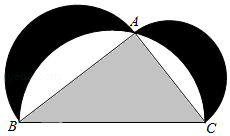

In [6]:
from PIL import Image
img = Image.open("../../asset/_static/item_figure.png")
figures = {"1": img}
img

## 导入模块

In [2]:
from EduNLP.SIF import sif4sci, is_sif, to_sif

## 验证题目格式

In [7]:
is_sif(item['stem'])

True

- 若发现题目因为公式没有包含在 `$$` 中而不符合 SIF 格式，则可以使用 `to_sif` 模块转成标准格式。示例如下：

In [8]:
text = '某校一个课外学习小组为研究某作物的发芽率y和温度x（单位...'
is_sif(text)

False

In [9]:
text = '某校一个课外学习小组为研究某作物的发芽率y和温度x（单位...'
to_sif(text)

'某校一个课外学习小组为研究某作物的发芽率$y$和温度$x$（单位...'

## 题目切分及令牌化

现在我们得到了符合标准格式的题目文本，接下来可以对题目做进一步的预训练，例如：切分和令牌化。

### 题目切分

#### 基本切分
分离文本、公式、图片和特殊符号。

In [12]:
segments = sif4sci(item["stem"], figures=figures, tokenization=False)
segments

['如图来自古希腊数学家希波克拉底所研究的几何图形．此图由三个半圆构成，三个半圆的直径分别为直角三角形', 'ABC', '的斜边', 'BC', ', 直角边', 'AB', ', ', 'AC', '.', '\\bigtriangleup ABC', '的三边所围成的区域记为', 'I', ',黑色部分记为', 'II', ', 其余部分记为', 'III', '.在整个图形中随机取一点，此点取自', 'I,II,III', '的概率分别记为', 'p_1,p_2,p_3', ',则', '\\SIFChoice', \FigureID{1}]

- 文本部分

In [13]:
segments.text_segments

['如图来自古希腊数学家希波克拉底所研究的几何图形．此图由三个半圆构成，三个半圆的直径分别为直角三角形',
 '的斜边',
 ', 直角边',
 ', ',
 '.',
 '的三边所围成的区域记为',
 ',黑色部分记为',
 ', 其余部分记为',
 '.在整个图形中随机取一点，此点取自',
 '的概率分别记为',
 ',则']

- 公式部分

In [15]:
segments.formula_segments


['ABC',
 'BC',
 'AB',
 'AC',
 '\\bigtriangleup ABC',
 'I',
 'II',
 'III',
 'I,II,III',
 'p_1,p_2,p_3']

- 图片部分

In [16]:
segments.figure_segments

[\FigureID{1}]

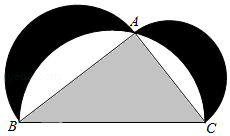

In [17]:
segments.figure_segments[0].figure

- 特殊符号

In [19]:
segments.ques_mark_segments

['\\SIFChoice']

#### 标记化切分  
如果您不注重题目文本和公式的具体内容，仅仅是对题目的整体（或部分）构成感兴趣，那么可以通过修改 `symbol` 参数来将不同的成分转化成特定标记，方便您的研究。

 - symbol:
    - "t": text
    - "f": formula
    - "g": figure
    - "m": question mark

In [11]:
sif4sci(item["stem"], figures=figures, tokenization=False, symbol="tfgm")

['[TEXT]', '[FORMULA]', '[TEXT]', '[FORMULA]', '[TEXT]', '[FORMULA]', '[TEXT]', '[FORMULA]', '[TEXT]', '[FORMULA]', '[TEXT]', '[FORMULA]', '[TEXT]', '[FORMULA]', '[TEXT]', '[FORMULA]', '[TEXT]', '[FORMULA]', '[TEXT]', '[FORMULA]', '[TEXT]', '[MARK]', '[FIGURE]']

### 令牌化

为了方便后续向量化表征试题，本模块提供题目文本的令牌化解析（Tokenization），即将题目转换成令牌序列。    

根据构成题目的元素类型，解析功能分为 **“文本解析”** 和 **“公式解析”** 两部分。更具体的过程解析参见 [令牌化](../Tokenizer/tokenizer.ipynb)。

In [20]:
tokens = sif4sci(item["stem"], figures=figures, tokenization=True)

- 文本解析结果

In [12]:
tokens.text_tokens

['如图',
 '古希腊',
 '数学家',
 '希波',
 '克拉底',
 '研究',
 '几何图形',
 '此图',
 '三个',
 '半圆',
 '三个',
 '半圆',
 '直径',
 '直角三角形',
 '斜边',
 '直角',
 '三边',
 '围成',
 '区域',
 '记',
 '黑色',
 '记',
 '其余部分',
 '记',
 '图形',
 '中',
 '随机',
 '取',
 '一点',
 '此点',
 '取自',
 '概率',
 '记']

#### 公式解析结果

In [13]:
tokens.formula_tokens

['ABC',
 'BC',
 'AB',
 'AC',
 '\\bigtriangleup',
 'ABC',
 'I',
 'II',
 'III',
 'I',
 ',',
 'II',
 ',',
 'III',
 'p',
 '_',
 '1',
 ',',
 'p',
 '_',
 '2',
 ',',
 'p',
 '_',
 '3']

- 自定义参数，得到定制化解析结果

（1）如果您想按 latex 语法标记拆分公式的各个部分，并得到顺序序列结果，输出方法（`method`）可以选择：`linear`

In [37]:
sif4sci(
    item["stem"],
    figures=figures,
    tokenization=True,
    tokenization_params={
        "formula_params": {
            "method": "linear",
        }
    }
).formula_tokens

['ABC',
 'BC',
 'AB',
 'AC',
 '\\bigtriangleup',
 'ABC',
 'I',
 'II',
 'III',
 'I',
 ',',
 'II',
 ',',
 'III',
 'p',
 '_',
 '1',
 ',',
 'p',
 '_',
 '2',
 ',',
 'p',
 '_',
 '3']

（2） 如果您想得到公式解析出的语法分析树序列，输出方法可以选择：`ast`
> 抽象语法分析树，简称语法树（Syntax tree），是源代码语法结构的一种抽象表示。它以树状的形式表现编程语言的语法结构，树上的每个节点都表示源代码中的一种结构。  
> 因此，ast 可以看做是公式的语法结构表征。

In [39]:
sif4sci(
    item["stem"],
    figures=figures,
    tokenization=True,
    tokenization_params={
        "formula_params":{
            "method": "ast",
        }
    }
).formula_tokens


[<Formula: ABC>,
 <Formula: BC>,
 <Formula: AB>,
 <Formula: AC>,
 <Formula: \bigtriangleup ABC>,
 <Formula: I>,
 <Formula: II>,
 <Formula: III>,
 <Formula: I,II,III>,
 <Formula: p_1,p_2,p_3>]

- 语法树展示：

In [109]:
f = sif4sci(
    item["stem"],
    figures=figures,
    tokenization=True,
    tokenization_params={
        "formula_params":{
            "method": "ast",
            "return_type": "ast",
            "ord2token": True,
            "var_numbering": True,
        }
    }
).formula_tokens
f


In [110]:
for i in range(0, len(f)):
    ForestPlotter().export(
        f[i], root_list=[node for node in f[i]],
    )
# plt.show()


（3）如果您只是关心公式的结构和类型，并不关心变量具体是什么，比如二元二次方程 `x^2 + y = 1` ，它从公式结构和类型上来说，和 `w^2 + z = 1` 没有区别。  
此时，您可以设置如下参数：`ord2token = True`，将公式变量名转换成 token

In [40]:
sif4sci(
    item["stem"],
    figures=figures,
    tokenization=True,
    tokenization_params={
        "formula_params":{
            "method": "ast",
            "return_type": "list",
            "ord2token": True,
        }
    }
).formula_tokens

['mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 '\\bigtriangleup',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 ',',
 'mathord',
 'mathord',
 ',',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'textord',
 '\\supsub',
 ',',
 'mathord',
 'textord',
 '\\supsub',
 ',',
 'mathord',
 'textord',
 '\\supsub']

（4） 如果您除了 （3） 中提供的功能之外，还需要区分不同的变量。此时可以另外设置参数：`var_numbering=True`

In [44]:
sif4sci(
    item["stem"],
    figures=figures,
    tokenization=True,
    tokenization_params={
        "formula_params":{
            "method": "ast",
            "ord2token": True,
            "return_type": "list",
            "var_numbering": True
        }
    }
).formula_tokens

['mathord_0',
 'mathord_1',
 'mathord_2',
 'mathord_1',
 'mathord_2',
 'mathord_0',
 'mathord_1',
 'mathord_0',
 'mathord_2',
 '\\bigtriangleup',
 'mathord_0',
 'mathord_1',
 'mathord_2',
 'mathord_3',
 'mathord_3',
 'mathord_3',
 'mathord_3',
 'mathord_3',
 'mathord_3',
 'mathord_3',
 ',',
 'mathord_3',
 'mathord_3',
 ',',
 'mathord_3',
 'mathord_3',
 'mathord_3',
 'mathord_4',
 'textord',
 '\\supsub',
 ',',
 'mathord_4',
 'textord',
 '\\supsub',
 ',',
 'mathord_4',
 'textord',
 '\\supsub']

## 综合令牌化

综合上述方法，将题目转换成令牌序列，为后续向量化做准备。

In [96]:
sif4sci(item["stem"], figures=figures, tokenization=True,
        symbol="fgm")

['如图', '古希腊', '数学家', '希波', '克拉底', '研究', '几何图形', '此图', '三个', '半圆', '三个', '半圆', '直径', '直角三角形', '[FORMULA]', '斜边', '[FORMULA]', '直角', '[FORMULA]', '[FORMULA]', '[FORMULA]', '三边', '围成', '区域', '记', '[FORMULA]', '黑色', '记', '[FORMULA]', '其余部分', '记', '[FORMULA]', '图形', '中', '随机', '取', '一点', '此点', '取自', '[FORMULA]', '概率', '记', '[FORMULA]', '[MARK]', '[FIGURE]']